
Una **nube de palabras** (también conocida como **nube de etiquetas** o **word cloud**) es una **representación visual** de las palabras que conforman un texto o conjunto de textos, donde el **tamaño de cada palabra** es proporcional a su **frecuencia o importancia** dentro del texto. Cuanto más aparece una palabra, o más relevante sea, mayor y más destacada se mostrará.

##  Usos comunes

- **Visualizar ideas clave o temas frecuentes** de manera rápida y atractiva.  
- **Mostrar etiquetas en sitios web o blogs**, resaltando los temas principales para mejorar la navegación o la experiencia del usuario.  
- **Explorar datos textuales cualitativos** como respuestas de encuestas o comentarios, identificando tendencias o palabras más mencionadas.  
- **Resumen visual de textos extensos** (investigaciones, manuales, artículos académicos o reseñas de productos), ayudando a captar rápidamente los puntos centrales.
- **Apoyo en presentaciones y marketing**, como elemento visual en infografías o slides para captar la atención del público.  
- **Herramienta interactiva en dinámicas grupales**, ideal para captar opiniones del público, romper el hielo o generar debates durante talleres, reuniones o clases.
- **Exploración rápida de temas principales en investigación textual**, útil como vista previa antes de análisis más profundos (“previewing” de temas, personajes o conceptos).  


##  Características

- **Estética visual**: A menudo presentan colores variados y disposición dispersa, lo que les da un aspecto atractivo aunque la elección de color puede ser meramente decorativa.  
- **Limitaciones analíticas**: Son útiles para obtener una vista general, pero no ofrecen contexto semántico ni relaciones profundas entre palabras.

## Errores a evitar
- **Preprocesar el texto**: Fusiona sinónimos, aplica **stemming* o lematización**, y limpia palabras redundantes o irrelevantes **(“stopwords”)**.  
- **Limitar el número de palabras**: Mostrar solo las más relevantes mejora la claridad.
- **Elegir diseño con propósito**: Usa fuentes legibles, colores que tengan significado.
- **Complementar con otras visualizaciones**: Usa gráficos de barras, tablas o análisis semántico para respaldar la nube con datos precisos y contexto.    

# Librería `wordcloud`

La librería **`wordcloud`** es una herramienta de Python diseñada para **generar nubes de palabras** a partir de uno o varios textos. Es muy útil para:
- **Análisis exploratorio de texto**, destacando las palabras más frecuentes.
- **Procesamiento de lenguaje natural (NLP)**, como paso visual previo a un análisis más profundo.
- **Visualizaciones e informes**, aportando un elemento gráfico atractivo y fácil de comprender.

## Características principales

- Permite **personalizar colores, fuentes y tamaño** de las palabras.
- Admite **enmascarar la nube con cualquier forma o imagen** (por ejemplo, un corazón, una estrella o un logotipo), gracias a su integración con **Pillow**.
  
## Instalación

Para instalar `wordcloud` junto con sus dependencias más comunes:

```bash
pip install wordcloud
pip install pillow


In [31]:
#pip install pillow

In [32]:
#pip install wordcloud

# Dataset: Base de Artículos Publicados 2015–2023

**Fuente:**  
[Secretaría de Educación Superior, Ciencia, Tecnología e Innovación (SENESCYT)](https://cloud-pro.senescyt.gob.ec/index.php/s/qfDbtQxawojJ2CG?openfile=true)

**Descripción:**  
Este dataset contiene la base estadística de artículos científicos publicados por las universidades y escuelas politécnicas de Ecuador en **revistas indexadas** durante el periodo **2015 – 2023**.  

In [33]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
df = pd.read_excel("Base_estadistica_articulos_UEP_15_23.xlsx", skiprows=12)
print(df["NOMBRE ARTICULO"].head())

0    KINETIC ALFVÉN WAVE GENERATION BY LARGE-SCALE ...
1    AMTEC CLUSTERS FOR POWER GENERATION IN A CONCE...
2    MÉTODO DE LENTE TÉRMICA RESUELTA EN FRECUENCIA...
3    SINGLE BEAM THERMAL DIFFUSIVITY MEASUREMENTS I...
4    GRAPH-THEORETIC ANALYSIS OF NETWORK INPUT-OUTP...
Name: NOMBRE ARTICULO, dtype: object


## Iteracion 1

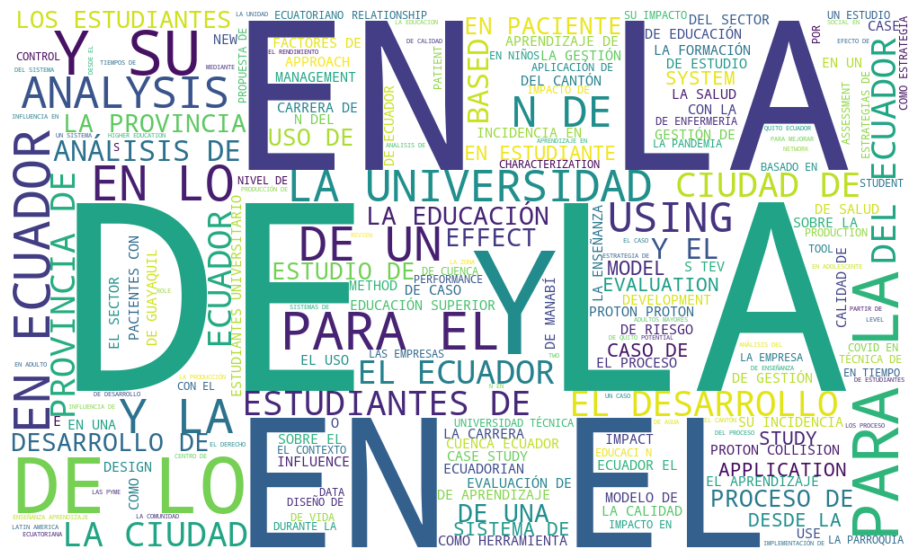

In [34]:

# Extraer la columna de títulos de artículos
textos = df["NOMBRE ARTICULO"].dropna().astype(str)

# Unir todos los títulos en un solo texto
texto_unido = " ".join(textos)

# Stopwords 
stopwords = set(STOPWORDS)

# Crear la nube de palabras
nube = WordCloud(
    width=1000,
    height=600,
    background_color="white",
    stopwords=stopwords,
    colormap="viridis"  # paleta de colores (puedes cambiar)
).generate(texto_unido)

# Mostrar la nube
plt.figure(figsize=(12, 7))
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
plt.show()


## Iteracion 2
Agregar stopwords en español.

In [35]:
with open("stopwords-es.txt", "r", encoding="utf-8") as f:
    stopwords_es = list([line.strip() for line in f if line.strip()])
stopwords_es[10:20]

['_',
 'a',
 'actualmente',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'adrede',
 'afirmó',
 'agregó']

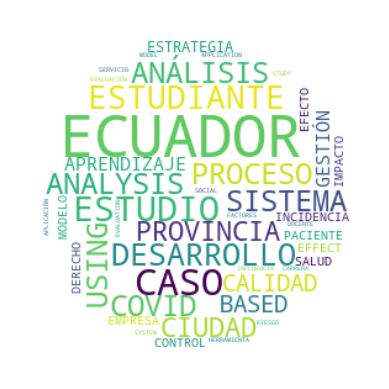

In [36]:
#agrega los de esp
stopwords = set(list(STOPWORDS)+ stopwords_es )
#forma circula 
import numpy as np
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
# Crear la nube de palabras
nube = WordCloud(
    width=1000,
    height=600,
    background_color="white",
    stopwords=stopwords,
    colormap="viridis" , # paleta de colores (puedes cambiar)
    mask=mask
).generate(texto_unido)

plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
plt.show()

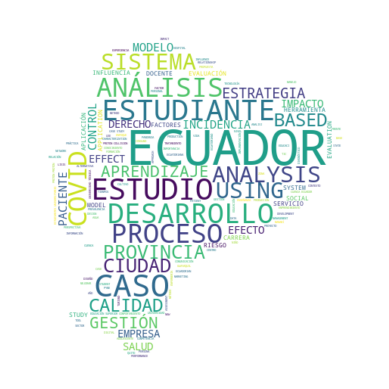

In [37]:
# imagen procesamiento

from PIL import Image, ImageOps
mask_img = Image.open("SiluetEcuador.png").convert("L")  

mask = np.array(mask_img)

#agrega los de esp
stopwords = set(list(STOPWORDS)+ stopwords_es )

# Crear la nube de palabras
nube = WordCloud(
    width=1000,
    height=700,
    background_color="white",
    stopwords=stopwords,
    colormap="viridis" , # paleta de colores (puedes cambiar)
    mask=mask
).generate(texto_unido)

plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
plt.show()

## Realice un  WordCloud de articulos de la Universidad San Francisco

In [38]:
df.columns

Index(['AÑO', 'TIPO', 'NOMBRE UNIVERSIDAD', 'TIPO FINANCIAMIENTO',
       'PROVINCIA UNIVERSIDAD', 'BASE DATOS INDEXADA', 'NOMBRE REVISTA',
       'NOMBRE ARTICULO', 'CAMPO AMPLIO', 'CAMPO ESPECIFICO',
       'CAMPO DETALLADO'],
      dtype='object')

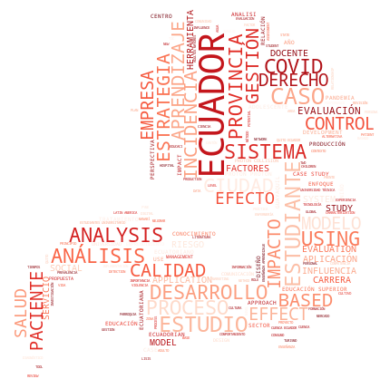

In [39]:
# Extraer la columna de títulos de artículos
textos = df[df['NOMBRE UNIVERSIDAD']=="UNIVERSIDAD SAN FRANCISCO DE QUITO"]["NOMBRE ARTICULO"].dropna().astype(str)

#agrega los de esp
stopwords = set(list(STOPWORDS)+ stopwords_es )
# imagen procesamiento
mask_img = Image.open("usfq.png").convert("L")  

mask = np.array(mask_img)


# Crear la nube de palabras
nube = WordCloud(
    width=1000,
    height=600,
    background_color="white",
    stopwords=stopwords,
    colormap="Reds" , # paleta de colores (puedes cambiar)
    mask=mask
).generate(texto_unido)

plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
plt.show()